<span style="font-size: 14pt">Домашнее задание №8 </span>

<span style="color: red; font-size: 14pt">Deadline: 20.05.2017 23:59:59</span>

<span style="font-size: 10pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, Модуль Unspervised Learning, </span>

<span style="color:blue; font-size: 10pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 10pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Воронцов К. В. Математические методы обучения по прецедентам. 2012. http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf (разделы 5.2 и 7.1)
- Hastie T., Tibshirani R., Friedman J. The Elements of Statistical Learning. Springer: Data Mining, Inference, and Prediction.  — 2nd ed. — Springer-Verlag. 2009. — 746 p.http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf (глава 14)



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_fall 496 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2017_496_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Дедлайн жесткий, в том числе помтоу что это ДЗ последнее в курсе. 

<h1 align="center">Контрольные вопросы (0 % - для самоконтроля) </h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В чём заключается проблема мультиколлинеарности?

**Вопрос 2**: Какие проблемы при обучении алгоритмов возникают из-за большой разамерности пространства признаков?

**Вопрос 3**: В чем суть проклятия размерности?

** Вопрос 4**: Какая связь между решением задачи PCA и SVD-разложение матрицы регрессии?

** Вопрос 5**: Почему в tSNE расстояние между парамми объектов измеряется "по-стьюденту" и как это помогает решить проблему "скрученности" (crowding problem)?

**Вопрос 6**: На какой идее базируются алгоритмы аггломеративной кластеризации? Напишите формулу Ланса-Вильма

**Вопрос 7**: Какие два шага выделяют в алгоритме кластеризации k-means?

**Вопрос 8**: В чём отличия (основные упрощения) k-means от EM-алгоритма кластеризации?

** Вопрос 9 **Какой принцип работы графовых алгоритмов кластеризации?

** Вопрос 10 **  В чем некорректность постановки задачи кластеризации?

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Вопросы по теории (30%) </h1> 

** Задача 1 ** 
Ответьте на вопросы:

 1) Как можно не прибегая к визуализации понять, что кластерная структура у данного облака точек отсутствует?
 2) Какие из алгоритмов кластеризации могут выделять кластеры с ленточной структурой? 
 3) Какие алгоритмы кластеризации чувствительны к шуму и перемычкам?
 4) Каким образом приближают «центр кластера» в нелинейных пространствах?
 5) Каким образом можно определять число кластеров?
 
** Задача 2 **
Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма  K-means (финальные центры кластеров), если начальные центры кластеров c1 = 1, c2 = 10.

Ответ: с1 = 3, c2 = 23/3

** Задача 3 **
Докажите, что the k-means всегда сходится.

** Задача 4 **
Для сжатия размерности пространства алгоритм PCA применяется датасету с количеством признаков $D = 100$. Наблюдается следующий спектр собственных значений матрицы объектов-признаков. 
<img src="PCA_lambda.png" width="600">
Ответье на вопросы

* 1) Высокая ли эффективная размерность пространства признаков (intrinsic dimensionality) (насколько она близка к 100)?
* 2) Можно ли перевести датасет с помощью PCA в пространство меньшей размерности с минимальными потерями точности? Если да, то чему примерно будет равна размернось 

<h2 align="center">Практическое задание 1 (30%) </h2>
Реализуйте PCA

In [1]:
import numpy as np
from numpy import linalg as la
import pylab as plt
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * F.dot(F.T)
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    U, d, V = la.svd(F.T)
    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    m = np.sum(var_i < varRetained * 100.)
    print '%.2f %% variance retained in %s dimensions' %( var_i[m], m )

    # plot the variance plot
    if show:
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    # compute the reduced dimensional features by projection
    U_reduced = V.T[:,:m]
    G = F.T.dot(U_reduced)
    return G, U_reduced

In [2]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal COmponent Analysis
95.07 % variance retained in 40 dimensions


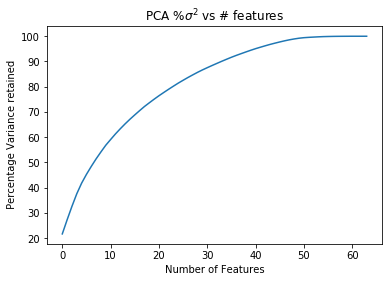

In [3]:
#################################################################
# PCA of training set
print 'Performing PCA - Principal COmponent Analysis'

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)

In [4]:
print Z
print U_reduced

[[  4.58612772e+01  -1.19211574e+00   2.11000593e+01 ...,   2.77637672e+00
    1.08339635e+00   2.79603567e-01]
 [  5.55296793e+01   7.86176977e+00  -2.04871986e+01 ...,  -2.06566530e+00
   -2.62347905e-01   7.24943377e-01]
 [  5.58278837e+01   6.91459576e+00  -9.66245273e+00 ...,  -8.64029615e-03
    1.03407080e+00   3.32564400e+00]
 ..., 
 [  6.55269853e+01   1.06587286e+01  -6.29456080e+00 ...,  -1.17825609e+00
    4.24475769e-01  -1.06720963e+00]
 [  5.86061659e+01  -4.91125210e+00   1.27231523e+01 ...,   1.33324857e-01
   -7.77839257e-01   5.10143077e-01]
 [  6.44482310e+01  -4.55513470e-01   7.04184347e+00 ...,  -6.63237391e-01
   -1.06715047e+00   4.76893855e+00]]
[[  1.93986680e-18  -7.54410187e-19   1.46125999e-17 ...,   1.14853190e-16
    4.59127995e-17   1.24274444e-17]
 [  5.77192878e-03  -1.73619371e-02  -9.85740003e-03 ...,  -2.21436704e-02
   -1.05228027e-02  -6.43467663e-02]
 [  1.00696020e-01  -2.24200800e-01  -4.48071690e-02 ...,   6.98896788e-02
   -9.96581450e-02   

<h1 align="center"><h2 align="center">Практическое задание 2 (40%) </h2> </h1>

<h2 align="left">Изучение алгоритмов кластеризации на разных выборках</h2>

### Кластеризация цифр с помощью dbscan
На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):
 - <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN'>dbscan </a> 
 запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про  метрические алгоритмы);
 - Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index. 
 - визуалируйте изображения тех цифр, которые соответствуют core_points;
 - визуалируйте изображения тех цифр, которые соответствуют выбросам;
 - сделайте выводы и применимости алгоритмов.



In [5]:
from time import time
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
%%time 

digits = load_digits()
tsne = TSNE()
X = scale(digits.data)
X = tsne.fit_transform(X)

n_samples, n_features = digits.data.shape
n_digits = len(np.unique(digits.target))
labels_true = digits.target

CPU times: user 6.46 s, sys: 577 ms, total: 7.04 s
Wall time: 7.06 s


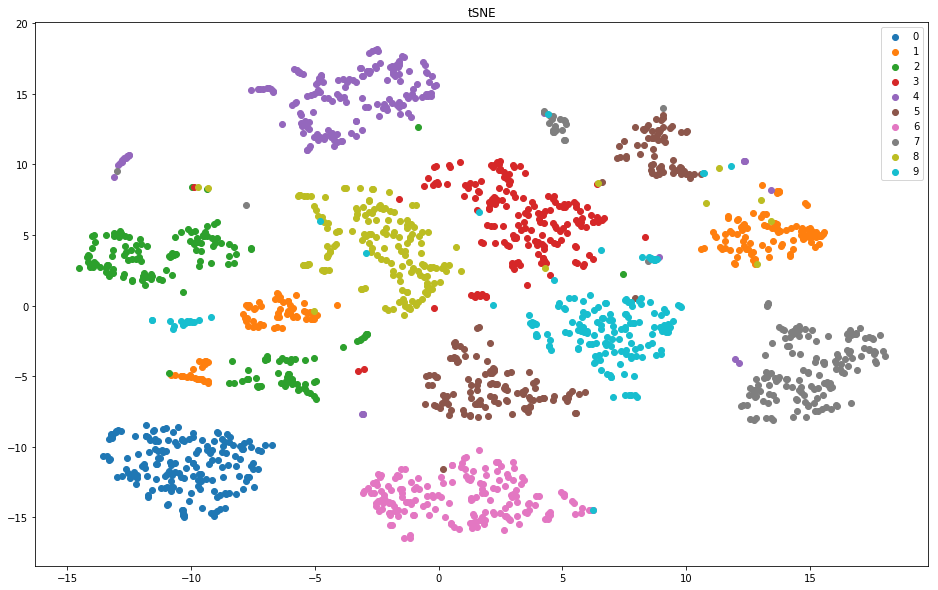

In [8]:
plt.figure(figsize=(16,10))
for i in np.unique(digits.target):
    plt.scatter(X[labels_true == i,0],X[labels_true == i,1], label='%s'%i)
plt.legend()
plt.title("tSNE")
plt.show()

In [9]:
np.random.seed(42)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


db = DBSCAN(eps=1.61, min_samples=9, metric='manhattan').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

print(sorted(set(db.labels_)))
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = n_digits

print('Estimated number of clusters: %d' % n_clusters_)
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

n_digits: 10, 	 n_samples 1797, 	 n_features 64
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Estimated number of clusters: 10
Adjusted Rand Index: 0.743
Adjusted Mutual Information: 0.777


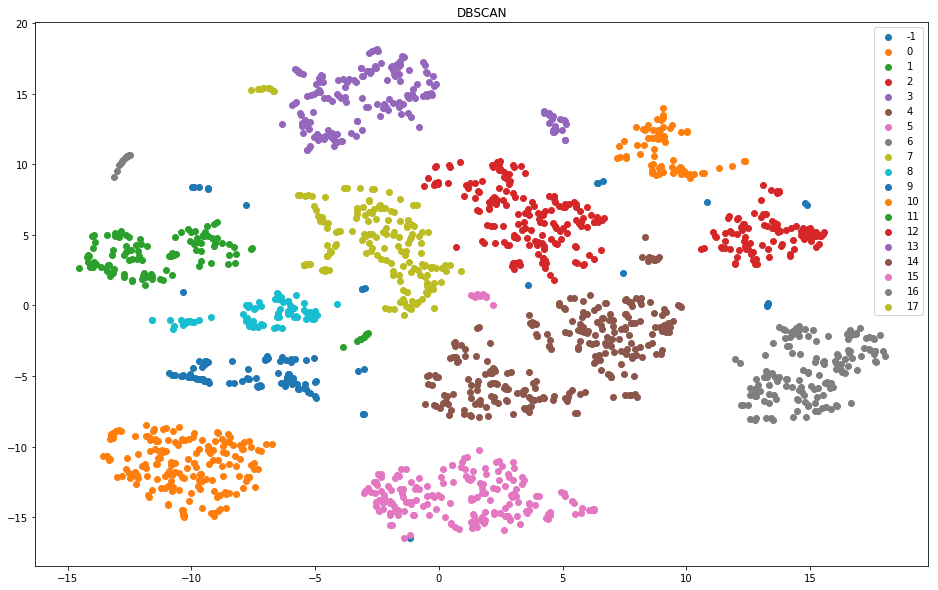

In [10]:
plt.figure(figsize=(16,10))
for i in sorted(set(db.labels_)):
    plt.scatter(X[labels == i,0],X[labels == i,1], label='%s'%i)
plt.legend()
plt.title('DBSCAN')
plt.show()

number of core  points: 1700


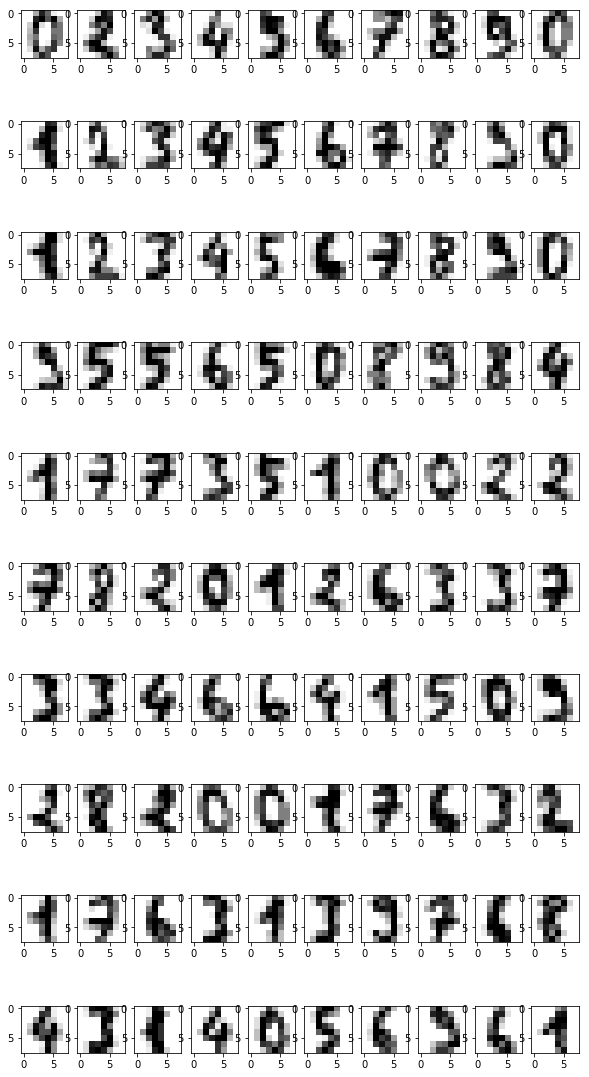

In [11]:
cores_n = len(db.core_sample_indices_)
print("number of core  points: %d" %cores_n)
plt.figure(figsize=(10,20))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(digits.images[db.core_sample_indices_[i]], cmap='binary') 
plt.show()

number of noise  points: 28


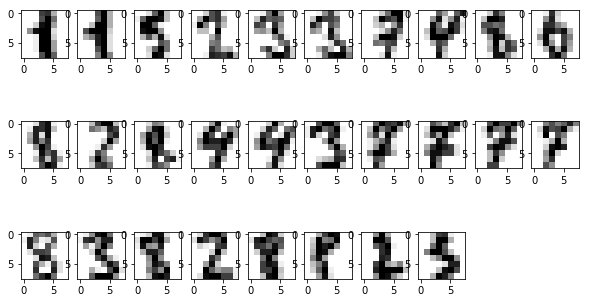

In [12]:
noise = [i for i in range(len(labels)) if labels[i] == -1]
print("number of noise  points: %d" % len(noise))
plt.figure(figsize=(10,20))
for i in range(min(100, len(noise))):
    plt.subplot(10, 10, i+1)
    plt.imshow(digits.images[noise[i]], cmap='binary') 
plt.show()

Добиться хорошего качества удалось только применив до DBSCAN метод понижения размерности(tSNE). В целом он работает хорошо, а шумовые картинки действительно сложно распознать.

##### Уменьшение палитры изображения
 - для <a href="https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg"> картинки </a> 
нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров,
все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру. 
 - Попробуйте различные алгоритмы кластеризации:
        -- KMeans
        -- MeanShift
        -- AgglomerativeClustering
   Рассмотрите число кластеров K = 2, 3, 10, 20
 - Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи
метрики <a href="http://scikit-image.org/docs/dev/api/skimage.measure.html"> SSIM</a>. Какой способ оказался лучшим?

In [13]:
img = plt.imread('birds.jpg') / 255.

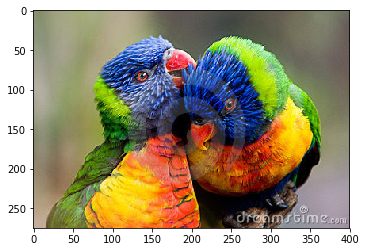

In [14]:
plt.imshow(img)
plt.show()

In [15]:
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, estimate_bandwidth
from skimage.measure import compare_ssim
from sklearn.neighbors import kneighbors_graph

In [16]:
n_clust = [2, 3, 10, 20]

In [17]:
def plotImgKMeans(n_clust, img = img):
    clusterer = KMeans(n_clusters=n_clust)
    img_vec = img.reshape(-1, 3)
    labels = clusterer.fit_predict(img_vec).reshape((img.shape[0], img.shape[1]))
    new_img = np.zeros_like(img, dtype = 'float')
    for i in np.unique(labels):
        new_img[labels == i] += img[labels == i].mean(0)
    plt.title('clusters = %s'%n_clust)
    plt.imshow(new_img)
    plt.show()
    print 'SSIM = %s' %compare_ssim(img, new_img, multichannel=True)

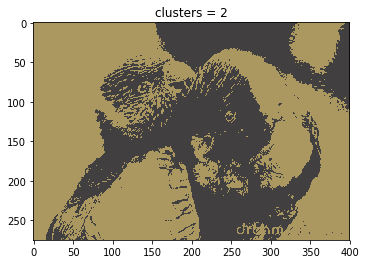

SSIM = 0.623130467716


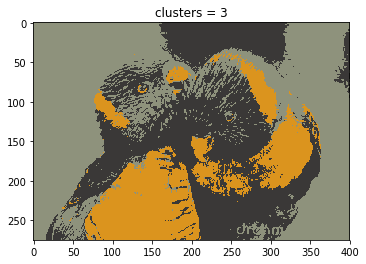

SSIM = 0.650869454397


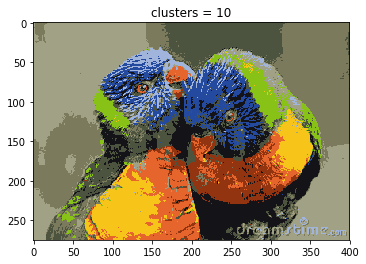

SSIM = 0.759211070776


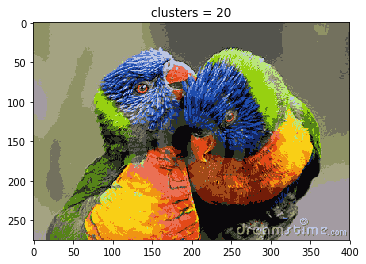

SSIM = 0.829147241995
CPU times: user 22.9 s, sys: 7.27 s, total: 30.2 s
Wall time: 30 s


In [18]:
%%time
for n in n_clust:
    plotImgKMeans(n)

In [19]:
quantiles = [0.2, 0.17, 0.0576,0.03]

In [20]:
def plotImgMeanShift(quant, img = img):
    img_vec = img.reshape(-1, 3)
    
    bandwidth = estimate_bandwidth(img_vec, quantile=quant, n_samples=500)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(img_vec)
    labels = ms.predict(img_vec).reshape((img.shape[0], img.shape[1]))
    new_img = np.zeros_like(img, dtype = 'float')
    for i in np.unique(labels):
        new_img[labels == i] += img[labels == i].mean(0)
    plt.title('clusters = %s'%len(np.unique(labels)))
    plt.imshow(new_img)
    plt.show()
    print 'SSIM = %s' %compare_ssim(img, new_img, multichannel=True)

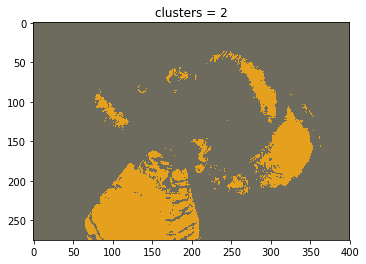

SSIM = 0.549007214107


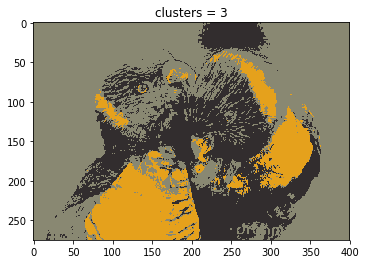

SSIM = 0.65422853754


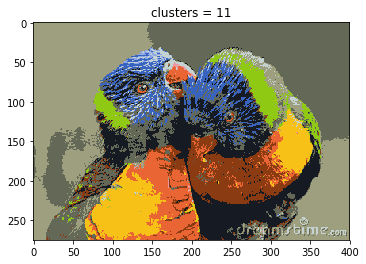

SSIM = 0.743472267937


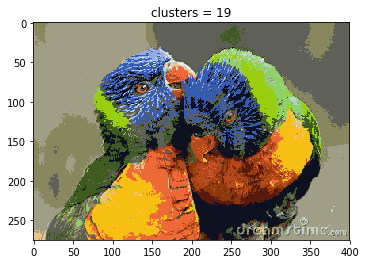

SSIM = 0.781077835349
CPU times: user 32.2 s, sys: 709 ms, total: 32.9 s
Wall time: 33.2 s


In [21]:
%%time
for n in quantiles:
    plotImgMeanShift(n)

In [22]:
def plotImgAGG(n_clust, img = img):
    img_vec = img.reshape(-1, 3)
    kng = kneighbors_graph(img_vec, 30, include_self=False)
    
    clusterer = AgglomerativeClustering(connectivity=kng, n_clusters=n_clust)
    
    labels = clusterer.fit_predict(img_vec).reshape((img.shape[0], img.shape[1]))
    new_img = np.zeros_like(img, dtype = 'float')
    for i in np.unique(labels):
        new_img[labels == i] += img[labels == i].mean(0)
    plt.title('clusters = %s'%n_clust)
    plt.imshow(new_img)
    plt.show()
    print 'SSIM = %s' %compare_ssim(img, new_img, multichannel=True)

/Users/ibirby/Documents/ML/env/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 13 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


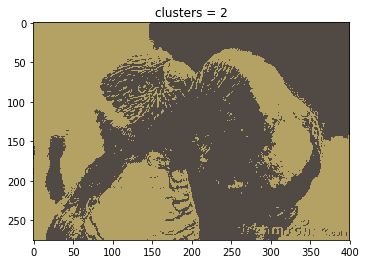

SSIM = 0.61673743646


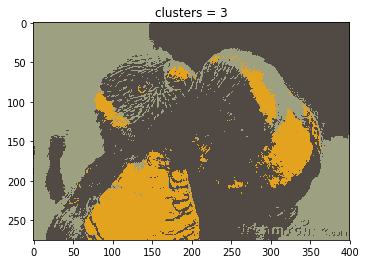

SSIM = 0.62771260392


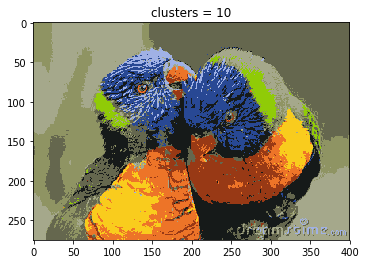

SSIM = 0.739332310885


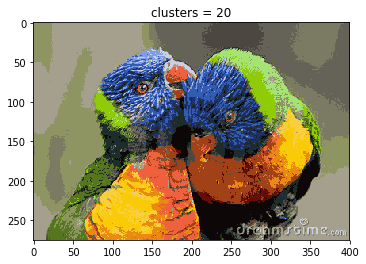

SSIM = 0.810740304692
CPU times: user 2min 59s, sys: 5.38 s, total: 3min 4s
Wall time: 3min 5s


In [23]:
%%time
for n in n_clust:
    plotImgAGG(n)

В итоге самый простой и быстрый KMeans дает лучшую похожесть картинок.